In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


X = np.array([[5, 3], [10, 15], [15, 12], [24, 10],
              [30, 45], [85, 70], [71, 80], [60, 78],
              [55, 52], [80, 91]])

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X.data)
kmeans.cluster_centers_.shape


(10, 2)

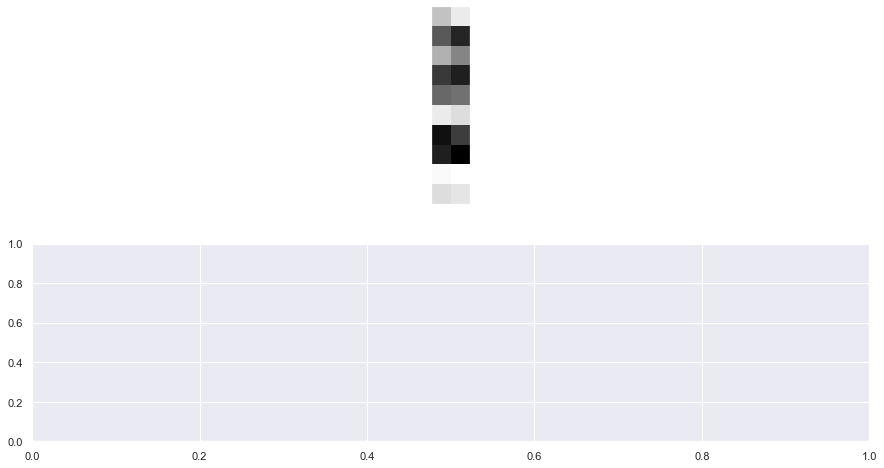

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8))
centers = kmeans.cluster_centers_.reshape(1, 10, 2)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest',
               cmap=plt.cm.binary)

plt.show()

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (147) found smaller than n_clusters (150). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


(150, 4)


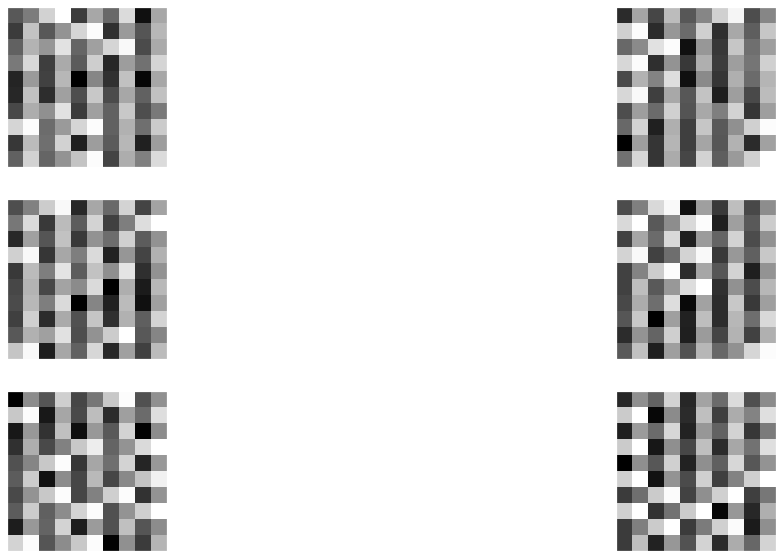

In [38]:
import pandas as pd
url = r'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534' \
      r'/iris.csv '
dataset = pd.read_csv(url)
arr = np.asarray(dataset.iloc[:, :-1])

kmeans = KMeans(n_clusters=150, random_state=0)
clusters = kmeans.fit_predict(arr.data)
print(kmeans.cluster_centers_.shape)

fig, ax = plt.subplots(3, 2, figsize=(20, 10))
centers = kmeans.cluster_centers_.reshape(6, 10, 10)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest',
               cmap=plt.cm.binary)

plt.show()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa (150, 5)


<Figure size 5040x2160 with 0 Axes>

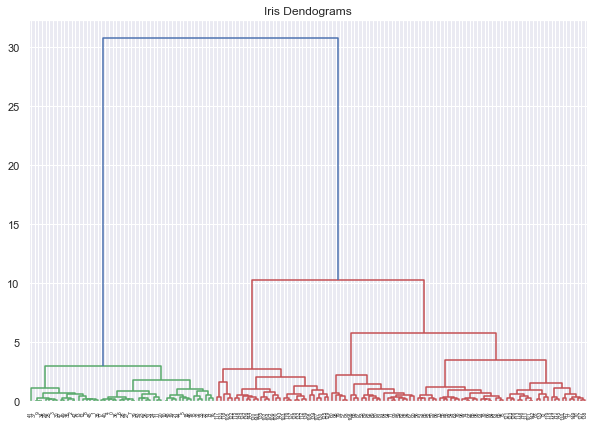

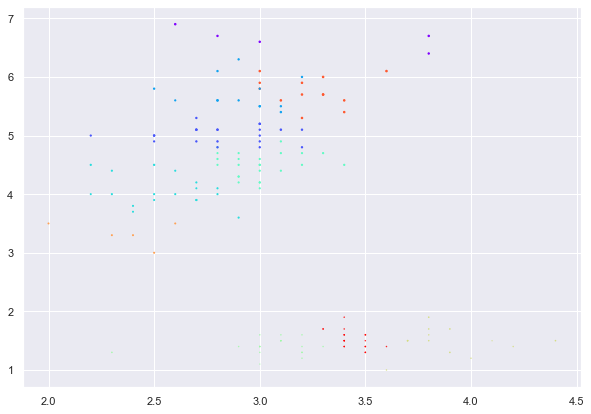

In [39]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

url1 = r'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534' \
      r'/iris.csv '
dataset1 = pd.read_csv(url)
print(dataset1.head(), dataset1.shape)
data = dataset1.iloc[:, 1:4].values

plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10, 7))
plt.title("Iris Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

cluster = AgglomerativeClustering(n_clusters=10,
                                  affinity='euclidean',
                                  linkage='ward')
cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], data[:, 2],
            c=cluster.labels_, cmap='rainbow')
plt.show()